In [1]:
import io
import pandas as pd
import requests
import matplotlib.pyplot as plt

#import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  

#import metrics and the split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

#import feature selection
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
#inserting the file
df=pd.read_excel('./clients.xls', header=1, index_col=0)
print("Original DataFrame size:", len(df))

Original DataFrame size: 30000


In [3]:
#creating a subset in order to decrease the set rows in 5%. By that the program doesn't lag for my PC
fraction_to_use = 0.05
df_subset = df.sample(frac=fraction_to_use, random_state=1)
print("Subset size:", len(df_subset))

Subset size: 1500


In [4]:
#initializing the classifiers into an array
classifiers = [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, KNeighborsClassifier, GaussianNB]
models = [classifier() for classifier in classifiers]

In [5]:
#split the dataset with a test size 40%
train, test = train_test_split(df_subset, test_size=0.4, random_state=42)
print('We are using', len(train),'samples for training the', len(models),'models and',len(test),'samples for testing them later.')

We are using 900 samples for training the 5 models and 600 samples for testing them later.


In [6]:
#extracting the last column as the target
input_features = list(df_subset.columns[:-1])   
target = 'default payment next month'

#feature selection with the best 5 columns
k_best_features = 5  
selector = SelectKBest(f_classif, k=k_best_features)
selector.fit(train[input_features], train[target])

selected_features = train[input_features].columns[selector.get_support()]
print("Selected features:", selected_features.tolist())
input_features = selected_features.tolist()

Selected features: ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']


In [7]:
accuracies = []
precisions = []
recalls = []
right = 0
prob_reals = []
f1_scores = []

#fitting the models
for m in models:
    m.fit(train[input_features], train[target])

#printing the accuracies of every classifier
for m in models:
    score = m.score(test[input_features], test[target])
    print(str(m), ": ",score)
    accuracies.append(score)

DecisionTreeClassifier() :  0.8316666666666667
RandomForestClassifier() :  0.8216666666666667
LogisticRegression() :  0.815
KNeighborsClassifier() :  0.8266666666666667
GaussianNB() :  0.825


In [8]:
#balanced Accuracy Scores
for m in models:
    
    predictions = m.predict(test[input_features])
    print()
    print("Balanced Accuracy Scores for", str(m), ":")
    balanced_accuracies = balanced_accuracy_score(test[target], predictions)
    print(balanced_accuracies)


Balanced Accuracy Scores for DecisionTreeClassifier() :
0.7059087827718308

Balanced Accuracy Scores for RandomForestClassifier() :
0.6942898582711923

Balanced Accuracy Scores for LogisticRegression() :
0.623157446674339

Balanced Accuracy Scores for KNeighborsClassifier() :
0.7052387633806814

Balanced Accuracy Scores for GaussianNB() :
0.7170074569216944


***** Classification report for  DecisionTreeClassifier() ***** 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       463
           1       0.69      0.47      0.56       137

    accuracy                           0.83       600
   macro avg       0.77      0.71      0.73       600
weighted avg       0.82      0.83      0.82       600



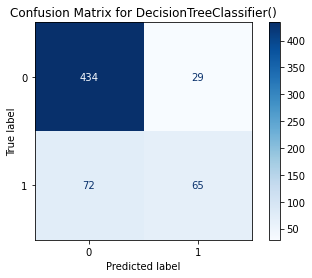

***** Classification report for  RandomForestClassifier() ***** 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       463
           1       0.66      0.46      0.54       137

    accuracy                           0.82       600
   macro avg       0.75      0.69      0.72       600
weighted avg       0.81      0.82      0.81       600



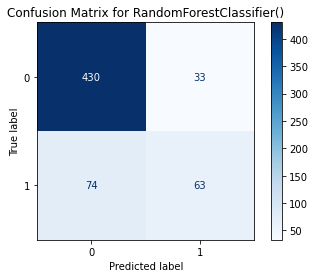

***** Classification report for  LogisticRegression() ***** 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       463
           1       0.77      0.27      0.40       137

    accuracy                           0.81       600
   macro avg       0.79      0.62      0.65       600
weighted avg       0.81      0.81      0.78       600



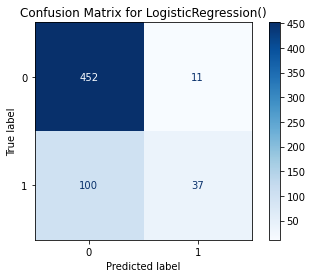

***** Classification report for  KNeighborsClassifier() ***** 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       463
           1       0.67      0.48      0.56       137

    accuracy                           0.83       600
   macro avg       0.76      0.71      0.73       600
weighted avg       0.81      0.83      0.82       600



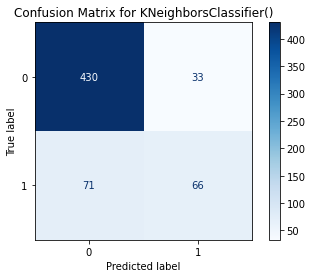

***** Classification report for  GaussianNB() ***** 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       463
           1       0.65      0.52      0.57       137

    accuracy                           0.82       600
   macro avg       0.76      0.72      0.73       600
weighted avg       0.82      0.82      0.82       600



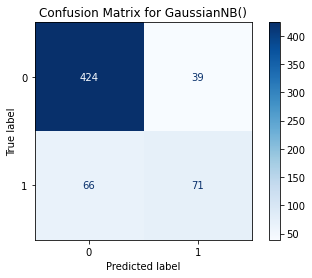

In [9]:
'''
1--> getting the metrics precision, recall and f1-score from the classification report of every model.
2--> we get these metrics except the first one on the the target of "1"
3--> printing the confusion matrix of every model
'''

for m in models:
    predictions = m.predict(test[input_features])
    print('***** Classification report for ', str(m), '***** ')
    print(classification_report(test[target], predictions))

    report = classification_report(test[target], predictions, output_dict=True)
    precisions.append(report['1']['precision'])
    recalls.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])  # Added F1 score

    # Plot confusion matrix
    cm = confusion_matrix(test[target], predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {str(m)}')
    plt.show()

In [10]:
# Calculate ROC-AUC score
for m in models:
    predictions = m.predict(test[input_features])
    
    roc_auc = roc_auc_score(test[target], predictions)
    
    print('***** ROC-AUC Score for ', str(m), '***** ')
    print(roc_auc)

***** ROC-AUC Score for  DecisionTreeClassifier() ***** 
0.7059087827718308
***** ROC-AUC Score for  RandomForestClassifier() ***** 
0.6942898582711923
***** ROC-AUC Score for  LogisticRegression() ***** 
0.623157446674339
***** ROC-AUC Score for  KNeighborsClassifier() ***** 
0.7052387633806814
***** ROC-AUC Score for  GaussianNB() ***** 
0.7170074569216944


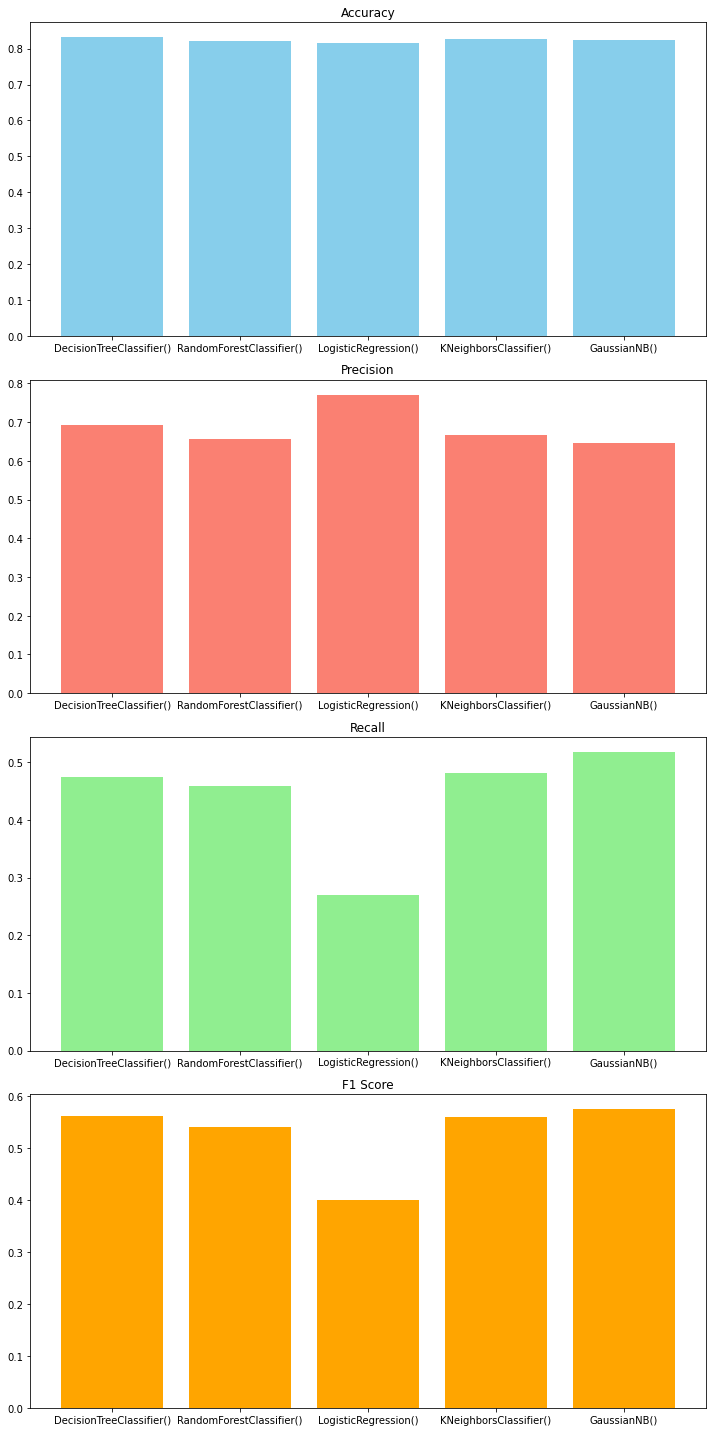

In [11]:
#plotting accuracy, precision, recall and f1-score of every model in order to get a greater visualisation
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

axes[0].bar([str(m) for m in models], accuracies, color='skyblue')
axes[0].set_title('Accuracy')

axes[1].bar([str(m) for m in models], precisions, color='salmon')
axes[1].set_title('Precision')

axes[2].bar([str(m) for m in models], recalls, color='lightgreen')
axes[2].set_title('Recall')

axes[3].bar([str(m) for m in models], f1_scores, color='orange')
axes[3].set_title('F1 Score')

plt.tight_layout()
plt.show()

In [12]:
#function of plotting the probabilities of every model and showing the correct guesses
def plot_prediction_probs_with_real_class(prob_reals, PROBABILITY_THRESHOLD=None):
    ones = []
    twos = []
    first_class = None
    second_class = None
    for prob, real in prob_reals:
        if not first_class:
            first_class = real
        if not second_class and real != first_class:
            second_class = real
        if real == first_class:
            ones.append(prob)
        else:
            twos.append(prob)

    fig = plt.figure(figsize=(9, 7))
    ax1 = fig.add_subplot(111)

    ax1.scatter(x=range(len(ones)), y=ones, c='red', marker='s', label=str(first_class))
    ax1.scatter(x=range(len(twos)), y=twos, c='blue', marker='o', label=str(second_class))
    items_in_x_axis = max(len(ones), len(twos))
    ax1.plot(range(items_in_x_axis), 
             [0.5]*items_in_x_axis, 
             color='grey', 
             linestyle='--',
             label='Sklearn threshold'
            )
    if PROBABILITY_THRESHOLD:
        ax1.plot(range(items_in_x_axis), 
                 [PROBABILITY_THRESHOLD]*items_in_x_axis, 
                 color='black', 
                 linewidth=1.5,
                 linestyle='--',
                 label='Our new threshold'
                )

    plt.title('Classifier Probability Distribution for Different Classes:')
    plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5));
    plt.ylim(0, 1)
    plt.show()

***** Classification report for  DecisionTreeClassifier() ***** 
Correctly guessed: 499 / 600 ( 83.17 %)


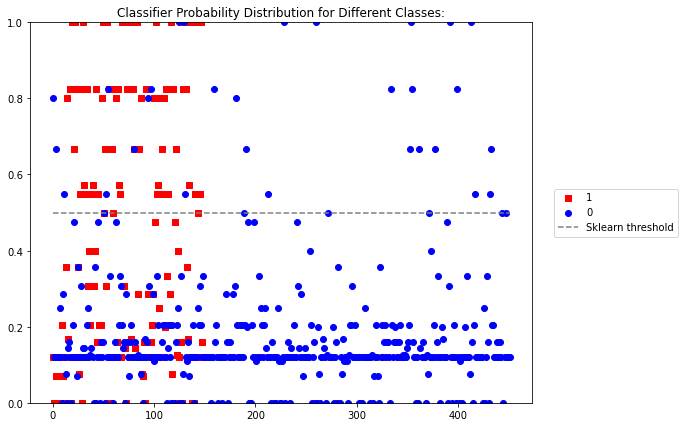

***** Classification report for  RandomForestClassifier() ***** 
Correctly guessed: 493 / 600 ( 82.17 %)


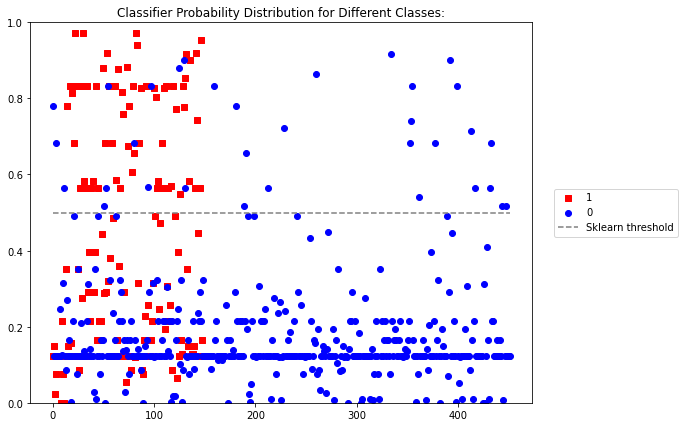

***** Classification report for  LogisticRegression() ***** 
Correctly guessed: 489 / 600 ( 81.5 %)


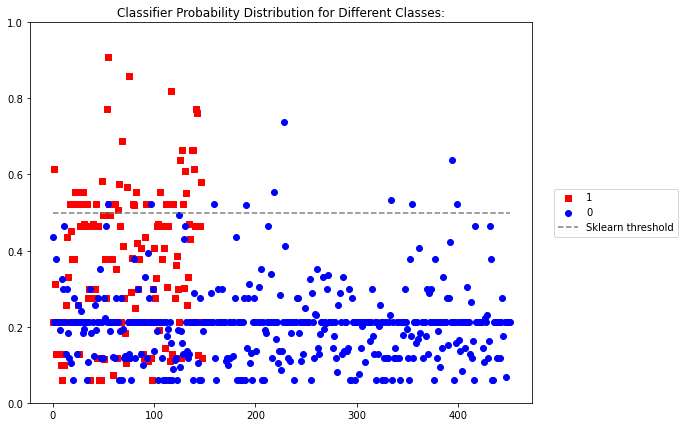

***** Classification report for  KNeighborsClassifier() ***** 
Correctly guessed: 496 / 600 ( 82.67 %)


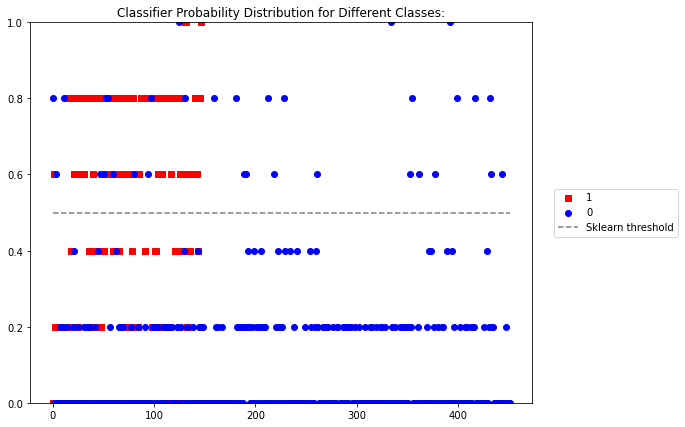

***** Classification report for  GaussianNB() ***** 
Correctly guessed: 495 / 600 ( 82.5 %)


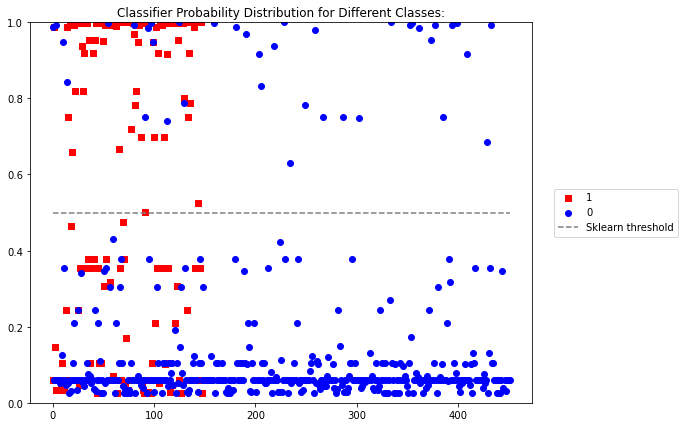

In [13]:
#calling the probability function of every model and visualise its performance 
for m in models:
    predictions = m.predict(test[input_features])
    right = (predictions == test[target]).sum()
    accuracy_percentage = round(100 * right / len(test), 2)
    print('***** Classification report for ', str(m), '***** ')
    print('Correctly guessed:', right, '/', len(test), '(', accuracy_percentage, '%)')
    pred_probs = m.predict_proba(test[input_features])[:, 1]
    plot_prediction_probs_with_real_class(zip(pred_probs.tolist(), test[target].tolist()))